In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt

# matplotlib image size and resolution
mpl_options = {"figsize":(10,10)}
sb.set(rc={'figure.figsize':(12,8)})

from inspect import signature as sig

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import cv2

### Загрузим датасет и возьмем только 2 фичи

In [2]:
from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

XX = X[['Petal Length','Sepal Length']]

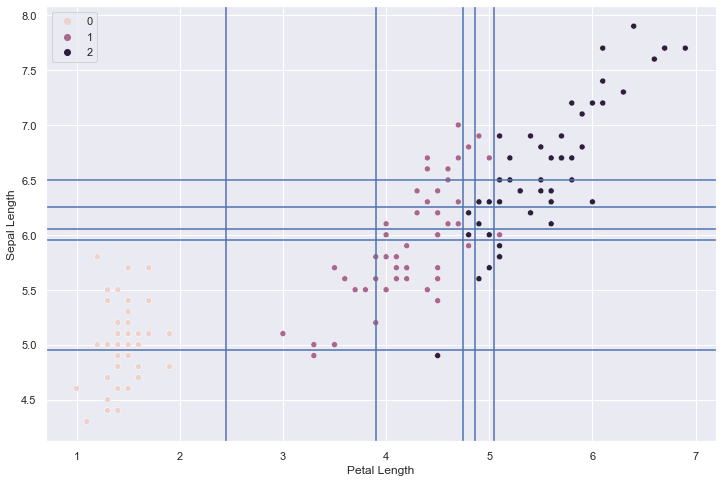

In [3]:
def show(XX, y):
    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)
    
show(XX, y)

### Скопируем из прошлой лекции

In [4]:
def draw(XX, model):
    points = np.random.randint(100,800,size=(10000,2))/100
    answers = model.predict(points).reshape(10000,1)
    stack = np.hstack((points, answers))

    s0 = np.array([i[:2] for i in stack  if i[2] == 0])
    s1 = np.array([i[:2] for i in stack  if i[2] == 1])
    s2 = np.array([i[:2] for i in stack  if i[2] == 2])

    sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

    plt.axvline(x=2.45)
    plt.axvline(x=4.75)
    plt.axvline(x=5.05)
    plt.axhline(y=4.95)
    plt.axhline(y=6.5)
    plt.axhline(y=6.05)
    plt.axvline(x=3.9)
    plt.axvline(x=4.86)
    plt.axhline(y=6.25)
    plt.axhline(y=5.95)

    plt.scatter(s0[:,0], s0[:,1] , color = 'orange', s = 3)
    plt.scatter(s1[:,0], s1[:,1] , color = 'red', s = 3)
    plt.scatter(s2[:,0], s2[:,1] , color = 'blue', s = 3)

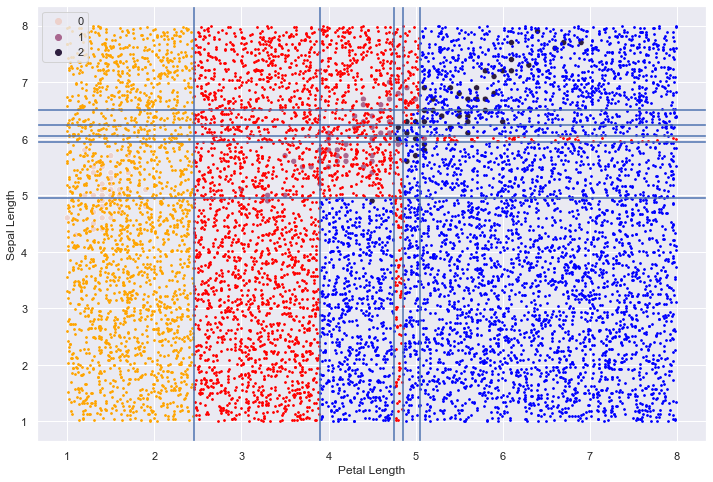

In [5]:
model = DecisionTreeClassifier()
model.fit(XX, y)
draw(XX, model)

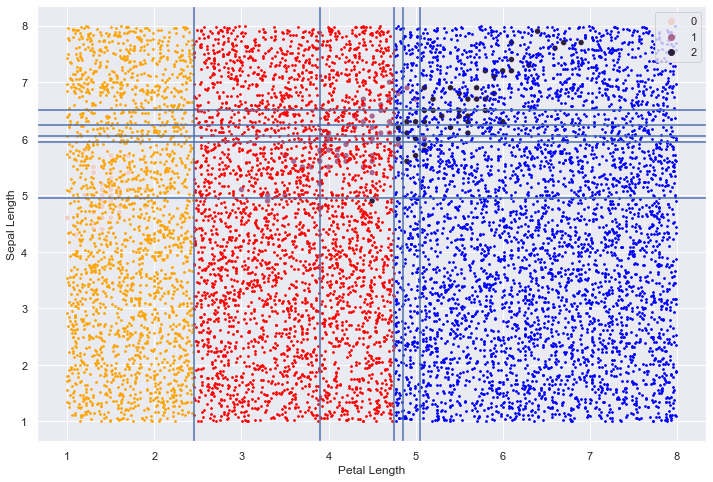

In [6]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(XX, y)
draw(XX, model)

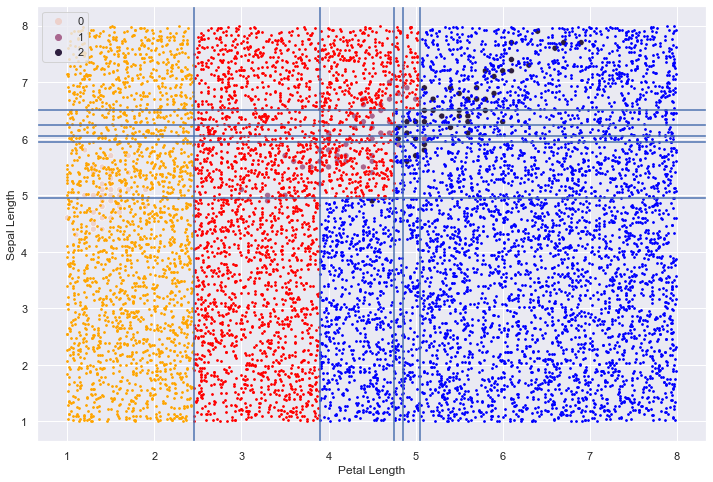

In [7]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(XX, y)
draw(XX, model)

### Первый способ избежать оверфита это просто держать дерево покороче

### Второй способ это избавиться от аутлаеров, например, перекрасить через KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier as KNC
nbrs_clf = KNC(n_neighbors = 3).fit(XX, y)

In [9]:
yy = nbrs_clf.predict(XX)

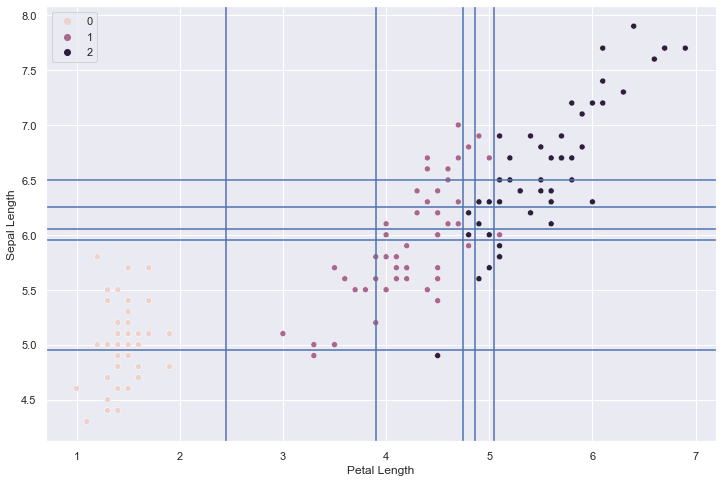

In [10]:
show(XX, y)

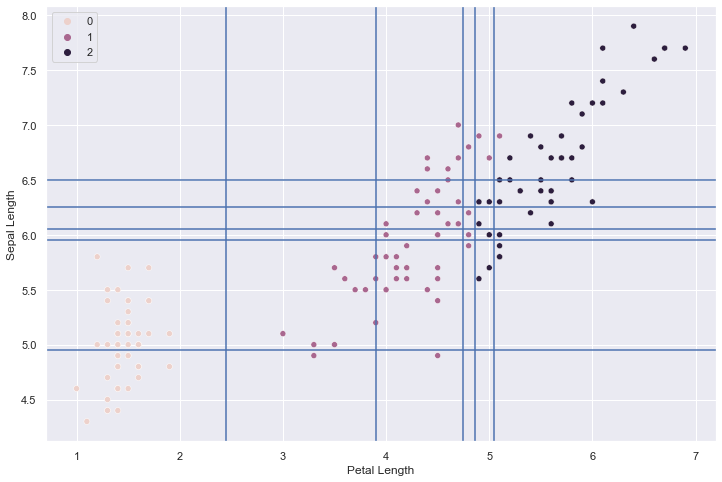

In [11]:
show(XX, yy)

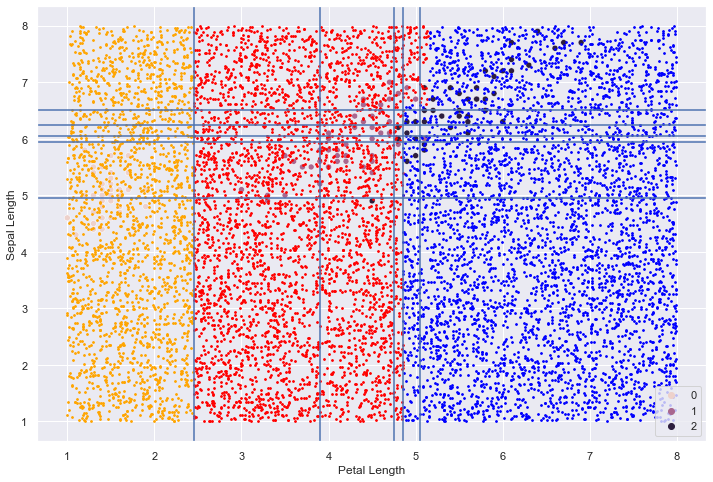

In [12]:
model = DecisionTreeClassifier()
model.fit(XX, yy)
draw(XX, model)

### Но правильный подход это, конечно же, выбирать тьюнинг параметр: глубину дерева или количество соседей, через кроссвалидацию... или брать подмножество данных, или как то еще. Соответственно, надо построить много деревьев и сравновать их перфоманс на разных сэмплах, это и называется ЛЕС.

### Но прежде чем мы перейдем к этому, поучимся еще рисовать собственно деревья

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree

from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

model = DecisionTreeClassifier()
fit = model.fit(X,y)

In [14]:
#!pip install graphviz

In [14]:
import graphviz 
sig(tree.export_graphviz)

<Signature (decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)>

In [15]:
dot_data = tree.export_graphviz(fit, out_file=None, feature_names=iris.feature_names, 
                                class_names=iris.target_names, 
                                filled=True, 
                                rounded=True,  
                                special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

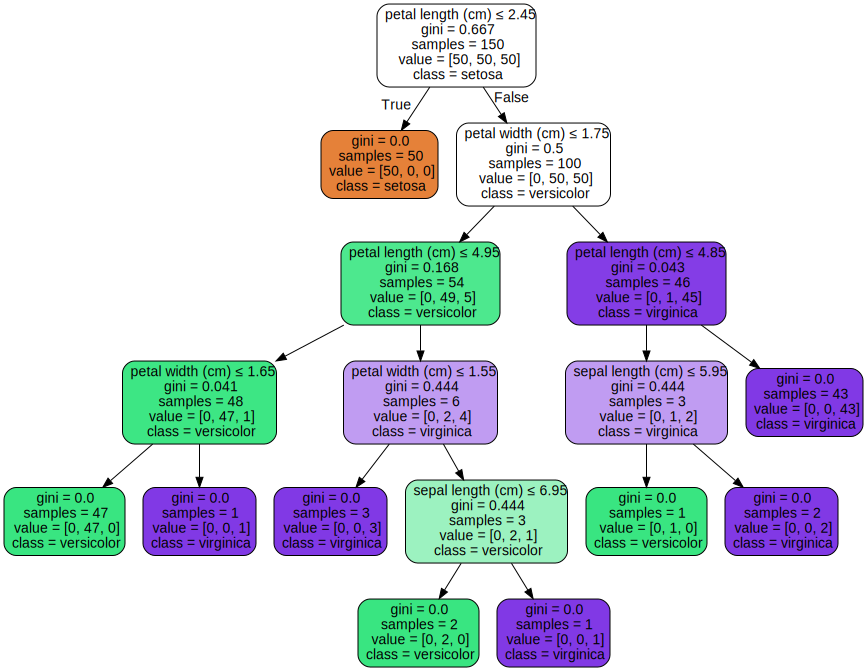

In [17]:
graph

### Поскольку деревья не способны производить таблицы значимости как логит или ОЛС, то для интерпретации результатов используются самые значимые фичи

In [18]:
model.feature_importances_

array([0.02666667, 0.        , 0.55072262, 0.42261071])

In [19]:
fit.feature_importances_

array([0.02666667, 0.        , 0.55072262, 0.42261071])

In [20]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']